# <center> Supervised learning: Classification with Titanic dataset </center>

## 1. Data types

![](https://miro.medium.com/max/1200/0*tZj7CTvSzNcjnISR)

## 2. Classification vs Regression
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 3. Titanic dataset

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.isna().sum()*100/len(titanic)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
### độ tuổi ảnh hưởng đến sự sinh tồn ntn?

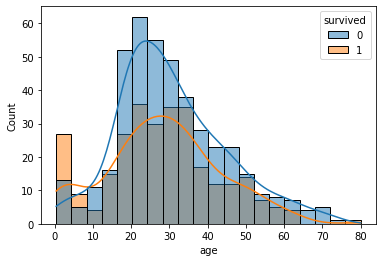

In [6]:
sns.histplot(titanic,x='age',hue='survived',kde = True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

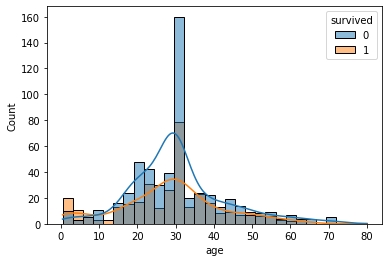

In [7]:
sns.histplot(titanic[['age','survived']].fillna(titanic['age'].mean()),x= 'age',hue = 'survived',kde = True)

In [8]:
### mối tương quan giữa giá vé cao thì  tỉ lệ sống sót cao

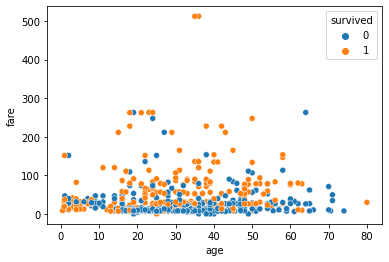

In [9]:
sns.scatterplot(data=titanic, x='age',y='fare', hue = 'survived')
plt.show()

In [10]:
titanic['sibsp'].value_counts(),titanic['parch'].value_counts()

(0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: sibsp, dtype: int64,
 0    678
 1    118
 2     80
 3      5
 5      5
 4      4
 6      1
 Name: parch, dtype: int64)

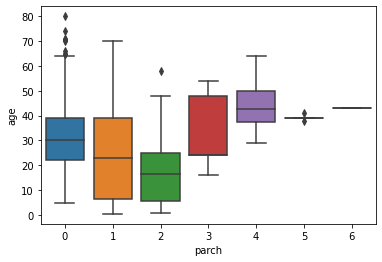

In [11]:
sns.boxplot(data=titanic, x='parch',y='age')
plt.show()

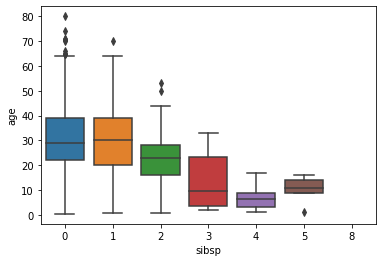

In [12]:
sns.boxplot(data=titanic,x='sibsp',y='age')
plt.show()

In [13]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [15]:
### nhóm các cụm who,sibpr,parch tìm đổ tuổi trung bình?

In [16]:
titanic.groupby(['who','sibsp','parch']).age.mean()

who    sibsp  parch
child  0      0        12.166667
              1         6.052500
              2         4.981111
       1      0        13.900000
              1         4.566667
              2         5.274286
       2      1         2.300000
              2         9.000000
       3      1         4.333333
              2         6.250000
       4      1         5.625000
              2         6.125000
       5      2         8.750000
man    0      0        32.973597
              1        38.583333
              2        35.800000
       1      0        32.701923
              1        36.000000
              2        30.750000
              3        16.000000
              4        52.000000
              5        39.000000
       2      0        31.181818
              1        23.000000
       3      1              NaN
              2        19.000000
       4      1        16.000000
       8      2              NaN
woman  0      0        31.084211
              1        

In [17]:
titanic.groupby(['who','sibsp','parch']).age.agg([len,'mean',lambda x: (x.isnull().sum()/len(x))])

len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597    0.260976
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923    0.118644
            1       21.0  36.000000    0.095238
            2        5.0  30.750000    0.200000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818    0.153846
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN    1.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN    1.000000
woman 0     0      121.0  31.084211    0.214876
            1       18.0  34.176471    0.055556
            2       15.0  26.833333    0.200000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556    0.237288
            1       21.0  35.450000    0.047619
            2        7.0  31.333333    0.142857
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000    0.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN    1.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN    1.000000

In [18]:
ser=titanic.groupby(['who','sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))

In [19]:
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [20]:
titanic.age.isnull().sum()

177

In [21]:
titanic['age']=ser
titanic.age.isnull().sum()

11

In [22]:
ser = titanic.groupby(['sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
titanic['age'] = ser
titanic.age.isnull().sum()

7

In [23]:
kid_avg_age = titanic[titanic['who']=='child'].age.mean()

In [24]:
titanic['age']=titanic['age'].fillna(kid_avg_age)
titanic.age.isnull().sum()

0

In [25]:
### cảng xuất phát

In [26]:
titanic['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [27]:
titanic[titanic['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [28]:
### loc cac ban ghi có giới tính là nữ, sống sót, đi 1 mình, sử dụng hạng vé 1

In [29]:
f1 = (titanic['survived']==1)
f2 = (titanic['pclass']==1)
f3 = (titanic['sibsp']==0)
f4 = (titanic['sex']=='female')
f5 = (titanic['parch']==0)
ser = titanic[f1 & f2 & f3 & f4 & f5]

In [30]:
ser['embarked'].mode()[0]

'C'

In [31]:
ser['embarked'].value_counts().idxmax()

'C'

In [33]:
titanic['embarked'] = titanic['embarked'].fillna(ser['embarked'].mode()[0])

In [34]:
titanic['embarked'].isnull().sum()

0

In [35]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
#groupby~ pivot_table
titanic.pivot_table(index='deck',
                   columns='pclass',
                   values='survived',
                   aggfunc='count')

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


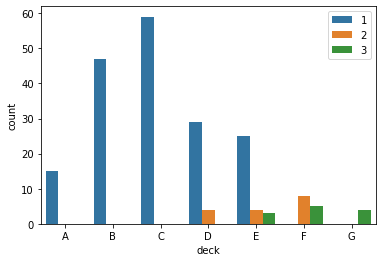

In [37]:
sns.countplot(data=titanic,x='deck',hue='pclass')
plt.legend(loc='upper right')
plt.show()

In [38]:
deck_dict={1:'C',
          2:'F',
          3:'F'}
ser=titanic['pclass'].map(deck_dict)
ser

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

In [39]:
#for s,d in zip(ser,deck):
 #   if d is None:
  #      d 

In [40]:
new_deck = titanic['deck'].combine_first(ser)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [41]:
titanic['deck'] = new_deck
titanic['deck'].value_counts(dropna=False)


F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [42]:
titanic.age.describe()

count    891.000000
mean      29.945476
std       13.342194
min        0.420000
25%       22.000000
50%       31.084211
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [43]:
pd.cut(titanic.age, bins=10)

0      (16.336, 24.294]
1       (32.252, 40.21]
2      (24.294, 32.252]
3       (32.252, 40.21]
4       (32.252, 40.21]
             ...       
886    (24.294, 32.252]
887    (16.336, 24.294]
888    (24.294, 32.252]
889    (24.294, 32.252]
890    (24.294, 32.252]
Name: age, Length: 891, dtype: category
Categories (10, interval[float64]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] < (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

In [44]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic.age, bins=age_groups)


0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [45]:
#women + rich(pclass)
titanic['rich_women'] = (titanic['sex']=='female')& (titanic['pclass']==1)
titanic['rich_women']

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: rich_women, Length: 891, dtype: bool

In [46]:
titanic['sex'] = titanic['sex'].map({'female':1,'male':0})
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,rich_women
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,False
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,False


In [47]:
titanic1=sns.load_dataset('titanic')
titanic1.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
titanic1['sex'].eq('female').astype(int).value_counts()

0    577
1    314
Name: sex, dtype: int64

In [49]:
##hàm eq check trong sex có famele hay ko, có thì là True

In [50]:
titanic['sex'].value_counts()

0    577
1    314
Name: sex, dtype: int64

In [51]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,rich_women
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,False
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,False


In [52]:
titanic.deck.value_counts()

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [53]:
# gộp nhóm rời rạc

In [54]:
ser = titanic['deck'].map({'A':1,
                         'B':1,
                         'C':1,
                         'D':0,
                         'E':0,
                         'F':0,
                         'G':0})
ser

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: deck, Length: 891, dtype: int64

In [55]:
titanic['new_deck']=ser
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,rich_women,new_deck
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,False,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,False,0
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,False,0


In [56]:
# biến boolean thành interger
for col in ['adult_male','alone','rich_women']:
    titanic[col]=titanic[col].astype(int)

titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,rich_women,new_deck
0,0,3,0,22.0,1,0,7.2500,S,Third,man,1,F,Southampton,no,0,0,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,1,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,0,F,Southampton,yes,1,0,0
3,1,1,1,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,1,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,1,F,Southampton,no,1,0,0


In [57]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic.age, bins=age_groups)
titanic['age_group'] = pd.cut(titanic.age, bins=age_groups)
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,rich_women,new_deck,age_group
0,0,3,0,22.0,1,0,7.2500,S,Third,man,1,F,Southampton,no,0,0,0,"(15, 25]"
1,1,1,1,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,1,1,"(35, 45]"
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,0,F,Southampton,yes,1,0,0,"(25, 35]"
3,1,1,1,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,1,1,"(25, 35]"
4,0,3,0,35.0,0,0,8.0500,S,Third,man,1,F,Southampton,no,1,0,0,"(25, 35]"


In [58]:
titanic.age_group.value_counts()

(25, 35]     358
(15, 25]     218
(35, 45]     118
(0, 15]       94
(45, 60]      81
(60, 80]      22
(80, 100]      0
Name: age_group, dtype: int64

In [59]:
titanic['age_group']=titanic['age_group'].astype(str).str.strip('(),[]').str.replace(',','_')
titanic['age_group']

0      15_ 25
1      35_ 45
2      25_ 35
3      25_ 35
4      25_ 35
        ...  
886    25_ 35
887    15_ 25
888    25_ 35
889    25_ 35
890    25_ 35
Name: age_group, Length: 891, dtype: object

In [60]:
dummies = pd.get_dummies(titanic[['age_group','embarked','who']])

In [61]:
titanic_new=titanic.join(dummies)
titanic_new.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,0,22.0,1,0,7.2500,S,Third,man,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,...,0,1,0,0,1,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,...,1,0,0,0,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,First,woman,...,1,0,0,0,0,0,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,...,1,0,0,0,0,0,1,0,1,0


## Train model

In [62]:
titanic_new.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'rich_women', 'new_deck', 'age_group',
       'age_group_0_ 15', 'age_group_15_ 25', 'age_group_25_ 35',
       'age_group_35_ 45', 'age_group_45_ 60', 'age_group_60_ 80',
       'embarked_C', 'embarked_Q', 'embarked_S', 'who_child', 'who_man',
       'who_woman'],
      dtype='object')

In [63]:
titanic_new=titanic_new.drop(columns= ['sex','age','fare','embarked', 'class',
                           'who', 'adult_male', 'deck', 'embark_town','alive','alone'])

In [64]:
titanic_new = titanic_new.drop(columns=['age_group'])
titanic_new.head(5)

,survived,pclass,sibsp,parch,rich_women,new_deck,age_group_0_ 15,age_group_15_ 25,age_group_25_ 35,age_group_35_ 45,age_group_45_ 60,age_group_60_ 80,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1
2,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [65]:
from sklearn.model_selection import train_test_split
x_data  = titanic_new.drop(columns = ['survived'])
y_data  = titanic_new['survived']
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state = 42)

In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [67]:
clf.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = clf.predict(x_test)

In [69]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [70]:
(y_pred==y_test).sum()/len(y_test) #accuracy thước đo độ chính xác

0.8324022346368715

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
accuracy_score(y_test,y_pred)

0.8324022346368715

In [73]:
import numpy as np

<AxesSubplot:>

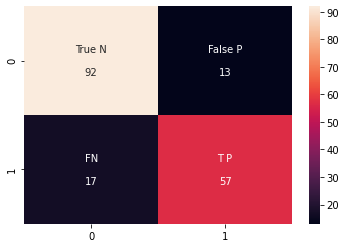

In [74]:
cf_matrix = confusion_matrix(y_test,y_pred)
names = ['True N','False P','FN','T P']
labels = np.asarray([f'{i}\n\n{j}' for i,j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot = labels.reshape(2,2), fmt='')

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [76]:
#depp leanrning

In [77]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [78]:
clf.fit(x_train,y_train)

LogisticRegression()

In [79]:
import pickle as pkl
pkl.dump(clf,open('trang_save_model.pkl','wb'))

In [80]:
loaded_model = pkl.load(open('trang_save_model.pkl','rb'))
loaded_model

LogisticRegression()

In [81]:
y_pred = loaded_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [82]:
import joblib
joblib.dump(clf,'trang_save_model1.joblib')

['trang_save_model1.joblib']

In [83]:
load_model1 = joblib.load('trang_save_model1.joblib')

In [84]:
y_pred = loaded_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [85]:
from sklearn.model_selection import train_test_split
training_data = titanic[['embarked', 'sex', 'pclass','age','survived']]
X_data, y_data = training_data.drop(columns=['survived']), training_data['survived']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 42, test_size = 0.2)


In [86]:
training_data.head(5)

,embarked,sex,pclass,age,survived
0,S,0,3,22.0,0
1,C,1,1,38.0,1
2,S,1,3,26.0,1
3,S,1,1,35.0,1
4,S,0,3,35.0,0


In [87]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [88]:
cat_cols = ['embarked','sex']
cat_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_cols = ['age']
num_transformer = Pipeline(steps = [('imputer', KNNImputer(n_neighbors=5)),
                                   ('scaler',RobustScaler())])


In [89]:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                              ('cat', cat_transformer, cat_cols)])


In [90]:
full_pipeline = Pipeline(steps = [('preprocess',preprocessor),
                                 ('classifier', LogisticRegression)])


In [91]:
# thiếu